In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# ---------------------------------------------------------------------
# 1. Wczytanie danych (zmień ścieżkę, jeśli plik jest w innym folderze)
# ---------------------------------------------------------------------
diabetes = pd.read_csv('diabetes.csv')

# Używamy tylko dwóch cech: 'Pregnancies' i 'Age'
X = diabetes[['Pregnancies', 'Age']]
y = diabetes['Diabetic']

# Podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=0,
    stratify=y
)

# ---------------------------------------------------------------------
# 2. Definicja funkcji do rysowania powierzchni decyzyjnej
# ---------------------------------------------------------------------
def plot_classification_surface(X_plot, y_plot, trained_model):
    """
    Rysuje powierzchnię decyzyjną (classification surface) w 2D.
    Zakładamy, że X_plot ma dwie kolumny (N,2).
    """
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.5),
        np.arange(y_min, y_max, 0.5)
    )
    Z = trained_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(3, 2))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    # Rysujemy dane oryginalne
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolors='k')
    plt.title("Classification Surface (AdaBoost)")
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------
# 3. Bazowy model AdaBoost
# ---------------------------------------------------------------------
model_adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=0
)
model_adaboost.fit(X_train, y_train)

# Rysujemy powierzchnię decyzyjną na zbiorze treningowym (lub testowym)
plot_classification_surface(
    X_plot=np.array(X_train),
    y_plot=y_train.values,
    trained_model=model_adaboost
)

# ---------------------------------------------------------------------
# 4. Ocena bazowego modelu
# ---------------------------------------------------------------------
y_pred = model_adaboost.predict(X_test)
y_proba = model_adaboost.predict_proba(X_test)[:, 1]

print("\n=== Classification Report (AdaBoost - Base) ===")
print(classification_report(y_test, y_pred))

auc_score = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc_score:.4f}")

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (AdaBoost - Base)")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 5. (Opcjonalnie) Eksperymenty z różnymi parametrami
# ---------------------------------------------------------------------
learning_rates = [0.01, 0.1, 1.0]
n_estimators_list = [50, 100, 200]
max_depth_list = [1, 2]

print("\n=== Eksperymenty z różnymi parametrami AdaBoost ===\n")

for lr in learning_rates:
    for n_est in n_estimators_list:
        for depth in max_depth_list:
            # Tworzymy 'base_estimator' z zadaną głębokością
            base_dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
            
            model_adaboost_custom = AdaBoostClassifier(
                estimator=base_dt,
                n_estimators=n_est,
                learning_rate=lr,
                algorithm='SAMME.R',  # lub 'SAMME'
                random_state=0
            )
            model_adaboost_custom.fit(X_train, y_train)
            
            y_pred_c = model_adaboost_custom.predict(X_test)
            y_proba_c = model_adaboost_custom.predict_proba(X_test)[:, 1]
            
            acc = (y_pred_c == y_test).mean()
            auc_c = roc_auc_score(y_test, y_proba_c)
            
            print(f"Params: learning_rate={lr}, n_est={n_est}, max_depth={depth}")
            print(f"Accuracy = {acc:.4f}, AUC = {auc_c:.4f}\n")

# ---------------------------------------------------------------------
# Koniec
# ---------------------------------------------------------------------


c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Urban\AppData\Local\Temp\ipykernel_19304\1405011423.py:161: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame([new_row])], ignore_index=True)



=== Classification Report: AdaBoost_Base ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.84      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.89      0.88      0.88      4500

AUC: 0.9536



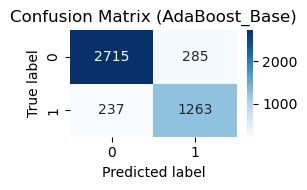

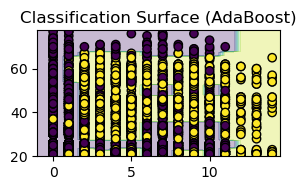

c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Urban\.conda\envs\kodilla-edu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm t

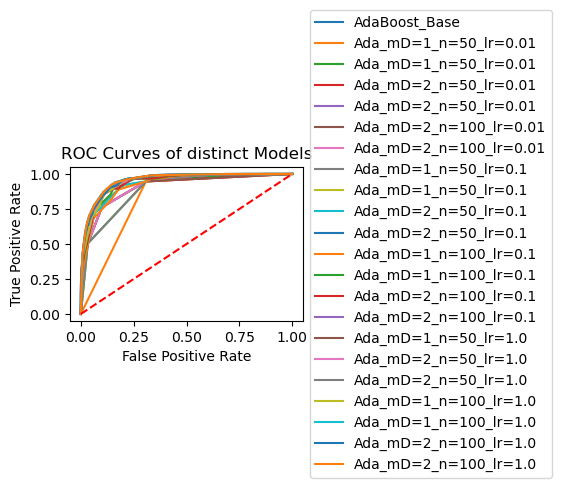


=== AdaBoost_Base ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.84      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.89      0.88      0.88      4500

AUC: 0.9536


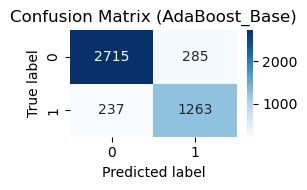

Rysowanie surface dla: AdaBoost_Base


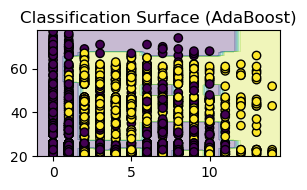


=== Ada_mD=1_n=50_lr=0.01 ===
              precision    recall  f1-score   support

           0       0.96      0.69      0.81      3000
           1       0.61      0.95      0.74      1500

    accuracy                           0.78      4500
   macro avg       0.78      0.82      0.77      4500
weighted avg       0.84      0.78      0.78      4500

AUC: 0.8193


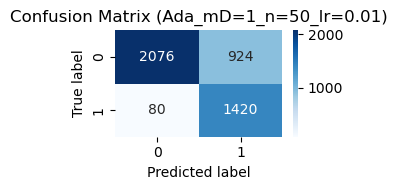

Rysowanie surface dla: Ada_mD=1_n=50_lr=0.01


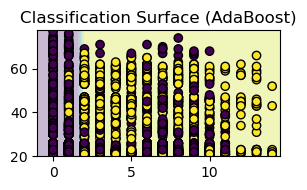


=== Ada_mD=1_n=50_lr=0.01 ===
              precision    recall  f1-score   support

           0       0.96      0.69      0.81      3000
           1       0.61      0.95      0.74      1500

    accuracy                           0.78      4500
   macro avg       0.78      0.82      0.77      4500
weighted avg       0.84      0.78      0.78      4500

AUC: 0.8874


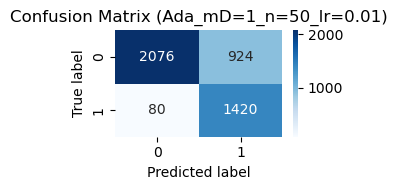

Rysowanie surface dla: Ada_mD=1_n=50_lr=0.01


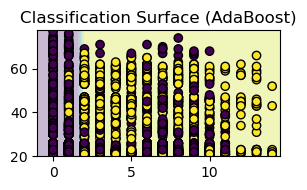


=== Ada_mD=2_n=50_lr=0.01 ===
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      3000
           1       0.88      0.50      0.64      1500

    accuracy                           0.81      4500
   macro avg       0.84      0.74      0.76      4500
weighted avg       0.83      0.81      0.80      4500

AUC: 0.9055


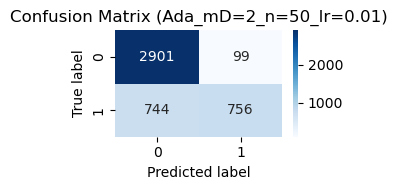


=== Ada_mD=2_n=50_lr=0.01 ===
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3000
           1       0.79      0.76      0.78      1500

    accuracy                           0.85      4500
   macro avg       0.84      0.83      0.83      4500
weighted avg       0.85      0.85      0.85      4500

AUC: 0.9160


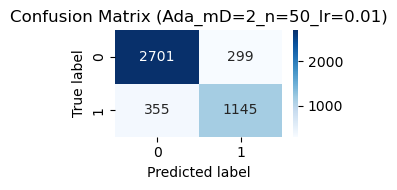


=== Ada_mD=2_n=100_lr=0.01 ===
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3000
           1       0.79      0.76      0.78      1500

    accuracy                           0.85      4500
   macro avg       0.84      0.83      0.83      4500
weighted avg       0.85      0.85      0.85      4500

AUC: 0.9054


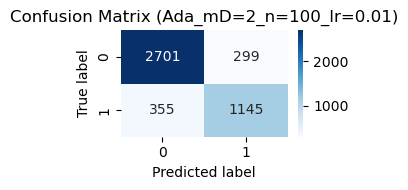


=== Ada_mD=2_n=100_lr=0.01 ===
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3000
           1       0.79      0.76      0.78      1500

    accuracy                           0.85      4500
   macro avg       0.84      0.83      0.83      4500
weighted avg       0.85      0.85      0.85      4500

AUC: 0.9159


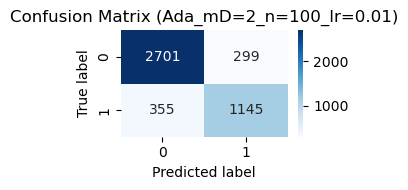


=== Ada_mD=1_n=50_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.96      0.69      0.81      3000
           1       0.61      0.95      0.74      1500

    accuracy                           0.78      4500
   macro avg       0.78      0.82      0.77      4500
weighted avg       0.84      0.78      0.78      4500

AUC: 0.8918


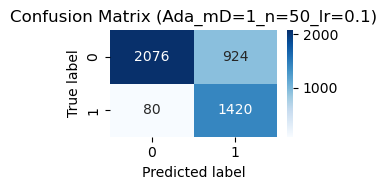

Rysowanie surface dla: Ada_mD=1_n=50_lr=0.1


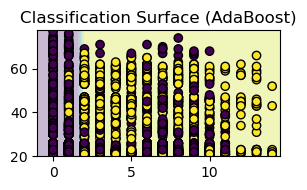


=== Ada_mD=1_n=50_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3000
           1       0.85      0.72      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.86      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500

AUC: 0.9298


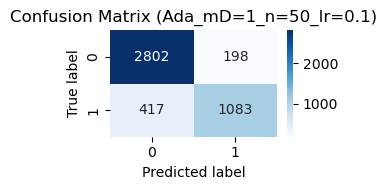

Rysowanie surface dla: Ada_mD=1_n=50_lr=0.1


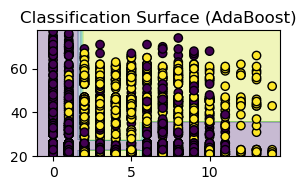


=== Ada_mD=2_n=50_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      3000
           1       0.85      0.72      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.86      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500

AUC: 0.9299


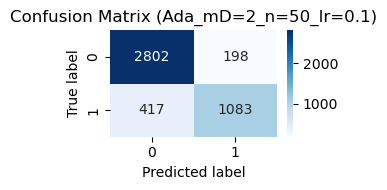


=== Ada_mD=2_n=50_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3000
           1       0.83      0.82      0.82      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.88      0.88      0.88      4500

AUC: 0.9525


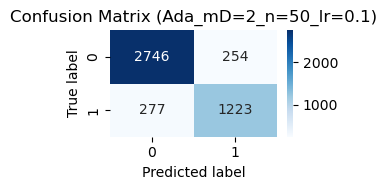


=== Ada_mD=1_n=100_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3000
           1       0.85      0.68      0.76      1500

    accuracy                           0.85      4500
   macro avg       0.85      0.81      0.83      4500
weighted avg       0.85      0.85      0.85      4500

AUC: 0.9246


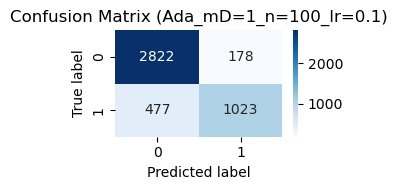

Rysowanie surface dla: Ada_mD=1_n=100_lr=0.1


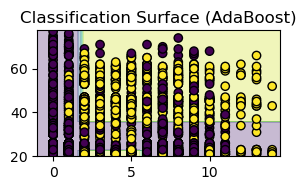


=== Ada_mD=1_n=100_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3000
           1       0.85      0.74      0.79      1500

    accuracy                           0.87      4500
   macro avg       0.87      0.84      0.85      4500
weighted avg       0.87      0.87      0.87      4500

AUC: 0.9380


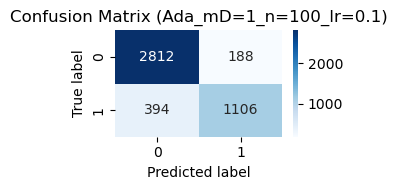

Rysowanie surface dla: Ada_mD=1_n=100_lr=0.1


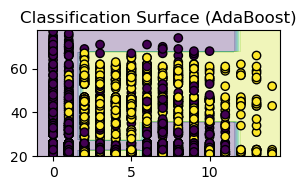


=== Ada_mD=2_n=100_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3000
           1       0.83      0.78      0.80      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.85      0.86      4500
weighted avg       0.87      0.87      0.87      4500

AUC: 0.9400


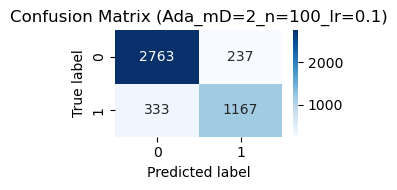


=== Ada_mD=2_n=100_lr=0.1 ===
              precision    recall  f1-score   support

           0       0.93      0.90      0.91      3000
           1       0.81      0.86      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.88      0.87      4500
weighted avg       0.89      0.88      0.89      4500

AUC: 0.9556


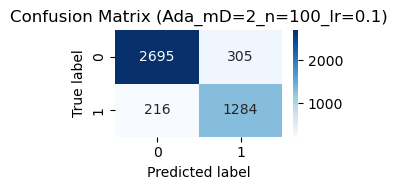


=== Ada_mD=1_n=50_lr=1.0 ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      3000
           1       0.81      0.81      0.81      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.86      0.86      4500
weighted avg       0.87      0.87      0.87      4500

AUC: 0.9443


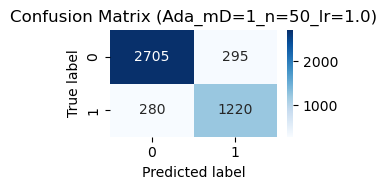

Rysowanie surface dla: Ada_mD=1_n=50_lr=1.0


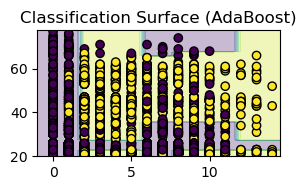


=== Ada_mD=2_n=50_lr=1.0 ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3000
           1       0.80      0.83      0.82      1500

    accuracy                           0.88      4500
   macro avg       0.86      0.87      0.86      4500
weighted avg       0.88      0.88      0.88      4500

AUC: 0.9467


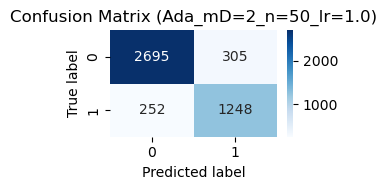


=== Ada_mD=2_n=50_lr=1.0 ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.83      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.88      0.88      0.88      4500

AUC: 0.9554


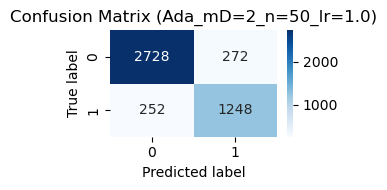


=== Ada_mD=1_n=100_lr=1.0 ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3000
           1       0.81      0.82      0.81      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.86      0.86      4500
weighted avg       0.87      0.87      0.87      4500

AUC: 0.9462


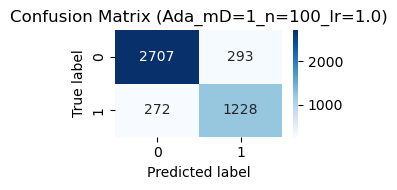

Rysowanie surface dla: Ada_mD=1_n=100_lr=1.0


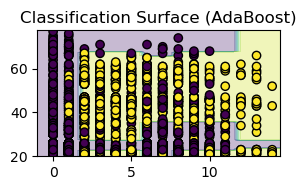


=== Ada_mD=1_n=100_lr=1.0 ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.84      0.83      1500

    accuracy                           0.89      4500
   macro avg       0.87      0.88      0.87      4500
weighted avg       0.89      0.89      0.89      4500

AUC: 0.9550


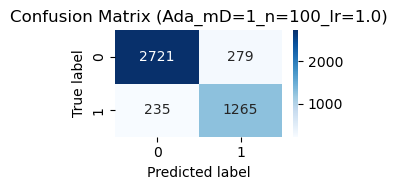

Rysowanie surface dla: Ada_mD=1_n=100_lr=1.0


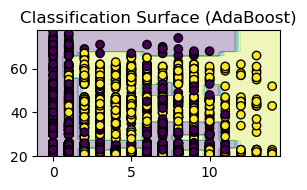


=== Ada_mD=2_n=100_lr=1.0 ===
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      3000
           1       0.81      0.83      0.82      1500

    accuracy                           0.88      4500
   macro avg       0.86      0.87      0.86      4500
weighted avg       0.88      0.88      0.88      4500

AUC: 0.9511


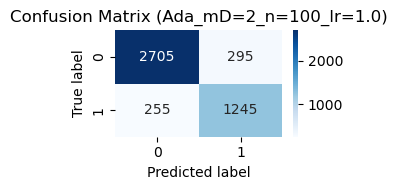


=== Ada_mD=2_n=100_lr=1.0 ===
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.83      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.88      0.88      0.88      4500

AUC: 0.9546


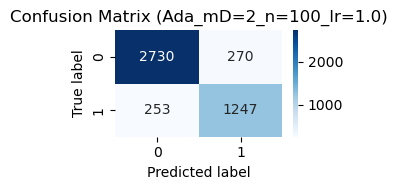


=== Zestawienie metryk ===


,Model,Params,Accuracy,Precision,Recall,F1_score,AUC
0,AdaBoost_Base,{'base_estimator': 'DecisionTree(max_depth=1)'...,0.884000,0.867803,0.873500,0.870519,0.953601
1,Ada_mD=1_n=50_lr=0.01,{'base_estimator': 'DecisionTree(max_depth=1)'...,0.776889,0.784348,0.819333,0.772045,0.819333
2,Ada_mD=1_n=50_lr=0.01,{'base_estimator': 'DecisionTree(max_depth=1)'...,0.776889,0.784348,0.819333,0.772045,0.887412
3,Ada_mD=2_n=50_lr=0.01,{'base_estimator': 'DecisionTree(max_depth=2)'...,0.812667,0.840048,0.735500,0.757588,0.905469
4,Ada_mD=2_n=50_lr=0.01,{'base_estimator': 'DecisionTree(max_depth=2)'...,0.854667,0.838386,0.831833,0.834931,0.915951
5,Ada_mD=2_n=100_lr=0.01,{'base_estimator': 'DecisionTree(max_depth=2)'...,0.854667,0.838386,0.831833,0.834931,0.905415
6,Ada_mD=2_n=100_lr=0.01,{'base_estimator': 'DecisionTree(max_depth=2)'...,0.854667,0.838386,0.831833,0.834931,0.915898
7,Ada_mD=1_n=50_lr=0.1,{'base_estimator': 'DecisionTree(max_depth=1)'...,0.776889,0.784348,0.819333,0.772045,0.891812
8,Ada_mD=1_n=50_lr=0.1,{'base_estimator': 'DecisionTree(max_depth=1)'...,0.863333,0.857945,0.828000,0.839983,0.929780
9,Ada_mD=2_n=50_lr=0.1,{'base_estimator': 'DecisionTree(max_depth=2)'...,0.863333,0.857945,0.828000,0.839983,0.929946


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore', category=UserWarning)

# --------------------------------------------------------------------
# 1. Wczytanie danych
# --------------------------------------------------------------------
diabetes = pd.read_csv("diabetes.csv")  # Zmień ścieżkę, jeśli jest w innym miejscu

# Używamy tylko dwóch cech: 'Pregnancies' i 'Age'
X = diabetes[['Pregnancies', 'Age']]
y = diabetes['Diabetic']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0,
    stratify=y
)

# --------------------------------------------------------------------
# 2. Definicje struktur i funkcji pomocniczych
# --------------------------------------------------------------------
metrics_dataframe = pd.DataFrame(
    columns=['Model', 'Params', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC']
)
stored_models = []
existing_metrics_set = set()  # Pozwoli eliminować duplikaty (jeśli metryki identyczne)

def get_metrics(model, X_eval, y_eval):
    """
    Oblicza główne metryki: accuracy, precision, recall, f1, auc.
    Zwraca także y_pred i y_proba (np. do rysowania ROC).
    """
    y_pred = model.predict(X_eval)
    y_proba = model.predict_proba(X_eval)[:, 1]

    # classification_report zwraca dictionary, z którego wyciągamy interesujące nas wartości
    report = classification_report(y_eval, y_pred, output_dict=True)
    accuracy = report['accuracy']
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_metric = report['macro avg']['f1-score']

    auc_metric = roc_auc_score(y_eval, y_proba)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1_metric,
        'auc': auc_metric,
        'y_pred': y_pred,
        'y_proba': y_proba
    }

def plot_confusion_matrix(model_name, y_true, y_pred):
    """
    Rysuje macierz pomyłek (confusion matrix).
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def plot_classification_surface(X_plot, y_plot, trained_model):
    """
    Rysuje powierzchnię decyzyjną w 2D (zakładamy, że X_plot ma shape=(N,2)).
    """
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.5),
        np.arange(y_min, y_max, 0.5)
    )
    Z = trained_model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(3, 2))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolors='k')
    plt.title("Classification Surface (AdaBoost)")
    plt.tight_layout()
    plt.show()

def plot_roc_curves(stored_models, X_test_data, y_test_data):
    """
    Rysuje zbiorczy wykres ROC dla wszystkich zapisanych modeli.
    stored_models to lista krotek: (model, model_name, y_pred, y_proba).
    """
    plt.figure(figsize=(3, 2))
    for (mdl, mdl_name, _, y_prob) in stored_models:
        fpr, tpr, _ = roc_curve(y_test_data, y_prob)
        plt.plot(fpr, tpr, label=mdl_name)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves of distinct Models")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    plt.show()

# --------------------------------------------------------------------
# 3. Bazowy model AdaBoost
# --------------------------------------------------------------------
model_adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    algorithm='SAMME.R',  # domyślnie 'SAMME.R' w nowszych wersjach,
    random_state=0
)
model_adaboost.fit(X_train, y_train)

# Obliczamy metryki i zapisujemy
base_metrics = get_metrics(model_adaboost, X_test, y_test)
base_model_name = "AdaBoost_Base"

base_metrics_tuple = (
    round(base_metrics['accuracy'], 4),
    round(base_metrics['precision'], 4),
    round(base_metrics['recall'], 4),
    round(base_metrics['f1'], 4),
    round(base_metrics['auc'], 4)
)
if base_metrics_tuple not in existing_metrics_set:
    existing_metrics_set.add(base_metrics_tuple)
    # Dodaj do metrics_dataframe
    new_row = {
        'Model': base_model_name,
        'Params': {
            'base_estimator': 'DecisionTree(max_depth=1)',
            'n_estimators': 50,
            'algorithm': 'SAMME.R'
        },
        'Accuracy': base_metrics['accuracy'],
        'Precision': base_metrics['precision'],
        'Recall': base_metrics['recall'],
        'F1_score': base_metrics['f1'],
        'AUC': base_metrics['auc']
    }
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame([new_row])], ignore_index=True)

    # Zapisujemy model do stored_models
    stored_models.append(
        (model_adaboost, base_model_name, base_metrics['y_pred'], base_metrics['y_proba'])
    )

# 3A. Raport klasyfikacji i macierz pomyłek dla bazowego modelu
print(f"\n=== Classification Report: {base_model_name} ===")
print(classification_report(y_test, base_metrics['y_pred']))
print(f"AUC: {base_metrics['auc']:.4f}\n")

plot_confusion_matrix(base_model_name, y_test, base_metrics['y_pred'])

# 3B. Powierzchnia decyzyjna dla bazowego modelu (na danych treningowych)
plot_classification_surface(
    X_plot=X_train.values,
    y_plot=y_train.values,
    trained_model=model_adaboost
)

# --------------------------------------------------------------------
# 4. Funkcja train_and_store_adaboost (opcjonalnie do kolejnych eksperymentów)
# --------------------------------------------------------------------
def train_and_store_adaboost(
    max_depth,
    n_estimators,
    learning_rate,
    algorithm,
    X_train_,
    y_train_,
    X_test_,
    y_test_
):
    global metrics_dataframe, stored_models, existing_metrics_set

    base_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    model = AdaBoostClassifier(
        estimator=base_dt,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        algorithm=algorithm,
        random_state=0
    )
    model.fit(X_train_, y_train_)

    mets = get_metrics(model, X_test_, y_test_)
    mets_tuple = (
        round(mets['accuracy'], 4),
        round(mets['precision'], 4),
        round(mets['recall'], 4),
        round(mets['f1'], 4),
        round(mets['auc'], 4)
    )

    if mets_tuple in existing_metrics_set:
        return

    existing_metrics_set.add(mets_tuple)
    model_name = f"Ada_mD={max_depth}_n={n_estimators}_lr={learning_rate}"

    new_row = {
        'Model': model_name,
        'Params': {
            'base_estimator': f"DecisionTree(max_depth={max_depth})",
            'n_estimators': n_estimators,
            'learning_rate': learning_rate,
            'algorithm': algorithm
        },
        'Accuracy': mets['accuracy'],
        'Precision': mets['precision'],
        'Recall': mets['recall'],
        'F1_score': mets['f1'],
        'AUC': mets['auc']
    }
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame([new_row])], ignore_index=True)

    stored_models.append(
        (model, model_name, mets['y_pred'], mets['y_proba'])
    )

# --------------------------------------------------------------------
# 5. (Opcjonalnie) Eksperymenty z różnymi parametrami w pętli
# --------------------------------------------------------------------
learning_rates = [0.01, 0.1, 1.0]
n_estimators_list = [50, 100]
max_depth_list = [1, 2]  # bo głębsze drzewa to zwykle inna dynamika AdaBoost
algo_list = ['SAMME', 'SAMME.R']

for lr in learning_rates:
    for n_est in n_estimators_list:
        for depth in max_depth_list:
            for algo in algo_list:
                train_and_store_adaboost(
                    max_depth=depth,
                    n_estimators=n_est,
                    learning_rate=lr,
                    algorithm=algo,
                    X_train_=X_train,
                    y_train_=y_train,
                    X_test_=X_test,
                    y_test_=y_test
                )

# --------------------------------------------------------------------
# 6. Zbiorczy wykres ROC dla wszystkich unikalnych modeli
# --------------------------------------------------------------------
plot_roc_curves(stored_models, X_test, y_test)

# (Opcjonalnie) Macierze pomyłek + classification surface (tylko dla kilku)
for (model, model_name, y_pred, y_proba) in stored_models:
    print(f"\n=== {model_name} ===")
    # Raport
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
    
    # Confusion matrix
    plot_confusion_matrix(model_name, y_test, y_pred)

    # Powierzchnia decyzyjna (uwaga: jeśli jest dużo modeli, rysowanie długo trwa)
    if "Base" in model_name or "mD=1" in model_name:
        print(f"Rysowanie surface dla: {model_name}")
        plot_classification_surface(
            X_plot=X_test.values,
            y_plot=y_test.values,
            trained_model=model
        )

# --------------------------------------------------------------------
# 7. Wyświetlenie końcowego DataFrame z metrykami
# --------------------------------------------------------------------
print("\n=== Zestawienie metryk ===")
metrics_dataframe
